# Investigation of n-grams In LDA

As the aim of our topic models is to perform a classification task, we spent some time considering ways in which we could encode the meaning of phrases which as seperate words may have essentially opposite meaning. For example, a review containing the word "good" should be categorised as negative if it happens to have the word "not" before it.

There are methods available to combine common phrases, with phrases of two words known as "bigrams", and phrases of n words known as "n-grams". We will now investigate adding them to our model, and perform a brief test on whether they provide any improvement for classification.

In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import numpy as np
np.random.seed(2018)

In [4]:
import gensim

C:\Users\ego99\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Here we load in a subset of the training data, as the full training set is too large to investigate this on for now.

In [9]:
trainingDf = pd.read_csv('data_cleaned_1.csv')
trainingDf.head()

,Unnamed: 0,score,text
0,0,3.0,"['good', 'helpfull', 'read', 'book', 'good', '..."
1,1,1.0,"['sadly', u'overprice', 'irrelevant', 'spite',..."
2,2,2.0,"['endless', 'rant', 'howard', u'borrow', 'denn..."
3,3,1.0,"['not', 'quite', 'hip', 'really', 'shame', 'ti..."
4,4,5.0,"['journey', 'centre', 'earth', 'hey', 'great',..."


In [6]:
from gensim import corpora

In [10]:
def myprocess(thisdoc):
    ## Runs on documents (vector of words)
    return(thisdoc.strip('[]').replace("u'", '').replace("'", '').replace(' ', '').split(','))

In [11]:
docs=trainingDf['text'].map(myprocess) 
docs[:10]

0    [good, helpfull, read, book, good, type, thats...
1    [sadly, overprice, irrelevant, spite, claim, i...
2    [endless, rant, howard, borrow, dennis, miller...
3    [not, quite, hip, really, shame, time, reserch...
4    [journey, centre, earth, hey, great, book, abs...
5    [long, land, free, repetitive, silly, prose, n...
6    [demon, view, amelia, atwater, rhodes, young, ...
7    [heartbreaking, but, live, novel, compassionat...
8    [wait, this, get, book, first, come, finally, ...
9    [awesome, book, absolutely, beautiful, daughte...
Name: text, dtype: object

Within gensim, the package we are using for LDA, there is built in n-gram functionality.

In [12]:
from gensim.models import Phrases

In [13]:
docsBi = trainingDf['text'].map(myprocess) 

This creates the n-grams, with 'min-count' and 'threshold' parameters to control how many are created (it will choose the most common phrases satisfying those requirements).

In [14]:
bigram_phrases = Phrases(docsBi, min_count=3, threshold=50)

We decided to investigate two seperate approaches. Firstly this option replaces the seperate words in the phrase with the n-grams.

In [15]:
bigram_replace = gensim.models.phrases.Phraser(bigram_phrases)

def make_bigrams(text):
    return(bigram_replace[doc] for doc in text)

In [16]:
docsBiReplace = list(make_bigrams(docs))

Secondly, here we simply add the n-grams on to the end of the document. This code is taken from [this](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) example of using n-grams.

In [18]:
for idx in range(len(docsBi)):
    for token in bigram_phrases[docsBi[idx]]:
        if '_' in token:
            docsBi[idx].append(token)                      

In [21]:
docs[3]

['not',
 'quite',
 'hip',
 'really',
 'shame',
 'time',
 'reserch',
 'go',
 'this',
 'time',
 'devote',
 'work',
 'research',
 'go',
 'evident',
 'noteworthy',
 'unfortunately',
 'waste',
 'ruined',
 'conclusion',
 'arrive',
 'analysis',
 'ruin',
 'book',
 'hip',
 'history',
 'informs',
 'sing',
 'blackface',
 'enlighten',
 'art',
 'rob',
 'bluesmen',
 'fruit',
 'labor',
 'mass',
 'consumerism',
 'betcha',
 'here',
 'research',
 'analyze',
 'explain',
 'except',
 'not',
 'argument',
 'justify',
 'inclusion',
 'act',
 'hip',
 'canon',
 'lack',
 'power',
 'compel',
 'anyone',
 'accept',
 'them',
 'even',
 'definition',
 'delineate',
 'theme',
 'fail',
 'miserably',
 'this',
 'must',
 'like',
 'teacher',
 'grade',
 'student',
 'math',
 'exam',
 'see',
 'follow',
 'proper',
 'step',
 'get',
 'answer',
 'wrong',
 'heartbreaking',
 'simply',
 'heartbreaking']

In [22]:
docsBi[3]

['not',
 'quite',
 'hip',
 'really',
 'shame',
 'time',
 'reserch',
 'go',
 'this',
 'time',
 'devote',
 'work',
 'research',
 'go',
 'evident',
 'noteworthy',
 'unfortunately',
 'waste',
 'ruined',
 'conclusion',
 'arrive',
 'analysis',
 'ruin',
 'book',
 'hip',
 'history',
 'informs',
 'sing',
 'blackface',
 'enlighten',
 'art',
 'rob',
 'bluesmen',
 'fruit',
 'labor',
 'mass',
 'consumerism',
 'betcha',
 'here',
 'research',
 'analyze',
 'explain',
 'except',
 'not',
 'argument',
 'justify',
 'inclusion',
 'act',
 'hip',
 'canon',
 'lack',
 'power',
 'compel',
 'anyone',
 'accept',
 'them',
 'even',
 'definition',
 'delineate',
 'theme',
 'fail',
 'miserably',
 'this',
 'must',
 'like',
 'teacher',
 'grade',
 'student',
 'math',
 'exam',
 'see',
 'follow',
 'proper',
 'step',
 'get',
 'answer',
 'wrong',
 'heartbreaking',
 'simply',
 'heartbreaking',
 'fail_miserably']

In [23]:
docsBiReplace[3]

['not',
 'quite',
 'hip',
 'really',
 'shame',
 'time',
 'reserch',
 'go',
 'this',
 'time',
 'devote',
 'work',
 'research',
 'go',
 'evident',
 'noteworthy',
 'unfortunately',
 'waste',
 'ruined',
 'conclusion',
 'arrive',
 'analysis',
 'ruin',
 'book',
 'hip',
 'history',
 'informs',
 'sing',
 'blackface',
 'enlighten',
 'art',
 'rob',
 'bluesmen',
 'fruit',
 'labor',
 'mass',
 'consumerism',
 'betcha',
 'here',
 'research',
 'analyze',
 'explain',
 'except',
 'not',
 'argument',
 'justify',
 'inclusion',
 'act',
 'hip',
 'canon',
 'lack',
 'power',
 'compel',
 'anyone',
 'accept',
 'them',
 'even',
 'definition',
 'delineate',
 'theme',
 'fail_miserably',
 'this',
 'must',
 'like',
 'teacher',
 'grade',
 'student',
 'math',
 'exam',
 'see',
 'follow',
 'proper',
 'step',
 'get',
 'answer',
 'wrong',
 'heartbreaking',
 'simply',
 'heartbreaking']

Create the dictionaries, bag of words corpus, and LDA models as before for each version.

In [24]:
dict_LoS = corpora.Dictionary(docs)
dict_LoSBi = corpora.Dictionary(docsBi)
dict_LoSBiReplace = corpora.Dictionary(docsBiReplace)

In [25]:
dict_LoS.filter_extremes(no_below=5, no_above=0.5)
dict_LoSBi.filter_extremes(no_below=5, no_above=0.5)
dict_LoSBiReplace.filter_extremes(no_below=5, no_above=0.5)

In [26]:
try:
    print("Reading corpus from pickle")
    bow_corpus=pickle.load(open('bow_corpus.pkl', 'rb'))
except FileNotFoundError:
    print("Creating corpus and saving to pickle")
    bow_corpus = [dict_LoS.doc2bow(w) for w in docs]
    pickle.dump(bow_corpus, open('bow_corpus.pkl', 'wb'))
    pickle.dump(dict_LoS, open('dictionary.pkl', 'wb'))
try:
    print("Reading corpus from pickle")
    bow_corpusBi=pickle.load(open('bow_corpusBi.pkl', 'rb'))
except FileNotFoundError:
    print("Creating corpus and saving to pickle")
    bow_corpusBi = [dict_LoSBi.doc2bow(w) for w in docsBi]
    pickle.dump(bow_corpusBi, open('bow_corpusBi.pkl', 'wb'))
    pickle.dump(dict_LoSBi, open('dictionaryBi.pkl', 'wb'))
try:
    print("Reading corpus from pickle")
    bow_corpusBiReplace=pickle.load(open('bow_corpusBiReplace.pkl', 'rb'))
except FileNotFoundError:
    print("Creating corpus and saving to pickle")
    bow_corpusBiReplace = [dict_LoSBiReplace.doc2bow(w) for w in docsBiReplace]
    pickle.dump(bow_corpusBiReplace, open('bow_corpusBiReplace.pkl', 'wb'))
    pickle.dump(dict_LoSBiReplace, open('dictionaryBiReplace.pkl', 'wb'))

Reading corpus from pickle
Creating corpus and saving to pickle
Reading corpus from pickle
Creating corpus and saving to pickle
Reading corpus from pickle
Creating corpus and saving to pickle


In [27]:
try:
    lda_model=pickle.load(open('lda_model.pkl', 'rb'))
    print("Reading lda_model from pickle")
except FileNotFoundError:
    print("Creating lda_model and saving to pickle")
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dict_LoS, passes=2, workers=2)
    pickle.dump(lda_model,open('lda_model.pkl','wb'))
try:
    lda_modelBi=pickle.load(open('lda_modelBi.pkl', 'rb'))
    print("Reading lda_model from pickle")
except FileNotFoundError:
    print("Creating lda_model and saving to pickle")
    lda_modelBi = gensim.models.LdaMulticore(bow_corpusBi, num_topics=15, id2word=dict_LoSBi, passes=2, workers=2)
    pickle.dump(lda_modelBi,open('lda_modelBi.pkl','wb'))
try:
    lda_modelBiReplace=pickle.load(open('lda_modelBiReplace.pkl', 'rb'))
    print("Reading lda_model from pickle")
except FileNotFoundError:
    print("Creating lda_model and saving to pickle")
    lda_modelBiReplace = gensim.models.LdaMulticore(bow_corpusBiReplace, num_topics=15, id2word=dict_LoSBiReplace, passes=2, workers=2)
    pickle.dump(lda_modelBiReplace,open('lda_modelBi.pkl','wb'))

Creating lda_model and saving to pickle
Creating lda_model and saving to pickle
Creating lda_model and saving to pickle


Now create a data frame of the topics chosen for each document. We can then use this to evaulate their predictive performance.

In [28]:
lda_scores = lda_model[bow_corpus]

all_topics_csr = gensim.matutils.corpus2csc(lda_scores)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_pandas = pd.DataFrame(all_topics_numpy)

lda_scoresBi = lda_modelBi[bow_corpusBi]

all_topics_csrBi = gensim.matutils.corpus2csc(lda_scoresBi)
all_topics_numpyBi = all_topics_csrBi.T.toarray()
all_topics_pandasBi = pd.DataFrame(all_topics_numpyBi)

In [29]:
lda_scoresBiReplace = lda_modelBiReplace[bow_corpusBiReplace]

all_topics_csrBiReplace = gensim.matutils.corpus2csc(lda_scoresBiReplace)
all_topics_numpyBiReplace = all_topics_csrBiReplace.T.toarray()
all_topics_pandasBiReplace = pd.DataFrame(all_topics_numpyBiReplace)

In [30]:
all_topics_pandas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.961079,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.993076,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.548322,0.0,0.132105,0.305267,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.062424,0.125766,0.0,0.000000,0.253429,0.000000,0.000000,0.0,0.0,0.000000,0.262795,0.000000,0.000000,0.286675,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.155865,0.000000,0.0,0.0,0.584369,0.000000,0.000000,0.000000,0.000000,0.236895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.0,0.000000,0.428717,0.000000,0.000000,0.0,0.0,0.260307,0.000000,0.260946,0.000000,0.000000,0.000000
49996,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.928198,0.000000,0.000000,0.000000,0.000000,0.000000
49997,0.000000,0.163530,0.0,0.000000,0.000000,0.203188,0.406913,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.201057
49998,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.928176,0.000000,0.000000,0.000000


In [31]:
all_topics_pandasBi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.000000,0.604244,0.000000,0.0,0.000000,0.040087,0.000000,0.00000,0.000000,0.322309,0.000000,0.000000,0.000000
1,0.070080,0.000000,0.034928,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.889098,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055214,0.206128,0.00000,0.000000,0.000000,0.000000,0.362612,0.363596
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.095429,0.286085,0.000000,0.00000,0.000000,0.244275,0.042020,0.000000,0.323384
4,0.000000,0.000000,0.000000,0.189950,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.787808,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.762761,0.000000,0.000000,0.000000,0.000000,0.0,0.186242,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
49996,0.000000,0.000000,0.000000,0.613544,0.000000,0.0,0.319778,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
49997,0.000000,0.190212,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.413175,0.00000,0.368995,0.000000,0.000000,0.000000,0.000000
49998,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.92818,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
all_topics_pandasBiReplace

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.630811,0.0,0.000000,0.101716,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.234098,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.198492,0.000000,0.0,0.0,0.0,0.794923,0.0
2,0.000000,0.000000,0.000000,0.0,0.552942,0.000000,0.0,0.000000,0.102101,0.000000,0.0,0.0,0.0,0.330393,0.0
3,0.000000,0.059504,0.133761,0.0,0.000000,0.064342,0.0,0.000000,0.430162,0.115954,0.0,0.0,0.0,0.188134,0.0
4,0.428570,0.000000,0.543407,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.937748,0.0,0.0,0.0,0.000000,0.0
49996,0.151928,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.769281,0.0,0.0,0.0,0.000000,0.0
49997,0.079798,0.000000,0.000000,0.0,0.171000,0.000000,0.0,0.721577,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
49998,0.000000,0.000000,0.928176,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


Add the scores to each dataframe, as the target variable.

In [33]:
all_topics_pandas['score'] = pd.Series(trainingDf['score'])

In [34]:
all_topics_pandas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,score
0,0.000000,0.961079,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
1,0.000000,0.000000,0.0,0.000000,0.993076,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,0.000000,0.548322,0.0,0.132105,0.305267,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
3,0.062424,0.125766,0.0,0.000000,0.253429,0.000000,0.000000,0.0,0.0,0.000000,0.262795,0.000000,0.000000,0.286675,0.000000,1.0
4,0.000000,0.000000,0.0,0.000000,0.000000,0.155865,0.000000,0.0,0.0,0.584369,0.000000,0.000000,0.000000,0.000000,0.236895,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.0,0.000000,0.428717,0.000000,0.000000,0.0,0.0,0.260307,0.000000,0.260946,0.000000,0.000000,0.000000,5.0
49996,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.928198,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
49997,0.000000,0.163530,0.0,0.000000,0.000000,0.203188,0.406913,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.201057,5.0
49998,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.928176,0.000000,0.000000,0.000000,4.0


In [35]:
all_topics_pandasBi['score'] = pd.Series(trainingDf['score'])

In [36]:
all_topics_pandasBiReplace['score'] = pd.Series(trainingDf['score'])

Starting with the no n-gram version, split into target and features.

In [37]:
y=all_topics_pandas.iloc[:,15]
X=all_topics_pandas.iloc[:,0:15]

In [38]:
y

0        3.0
1        1.0
2        2.0
3        1.0
4        5.0
        ... 
49995    5.0
49996    5.0
49997    5.0
49998    4.0
49999    5.0
Name: score, Length: 50000, dtype: float64

In [39]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.961079,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.993076,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.548322,0.0,0.132105,0.305267,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.062424,0.125766,0.0,0.000000,0.253429,0.000000,0.000000,0.0,0.0,0.000000,0.262795,0.000000,0.000000,0.286675,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.155865,0.000000,0.0,0.0,0.584369,0.000000,0.000000,0.000000,0.000000,0.236895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.0,0.000000,0.428717,0.000000,0.000000,0.0,0.0,0.260307,0.000000,0.260946,0.000000,0.000000,0.000000
49996,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.928198,0.000000,0.000000,0.000000,0.000000,0.000000
49997,0.000000,0.163530,0.0,0.000000,0.000000,0.203188,0.406913,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.201057
49998,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.928176,0.000000,0.000000,0.000000


Now split it into a train and test set. When it comes to properly evaulating our models, we will want the test set to be unseen, but as the topic models are unsupervised, it does not matter too much for now.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

We should add weightings to allow for the unbalanced classes in our dataset. This code is from [here](https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost).

In [42]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [43]:
classes_weights

array([0.3302919 , 0.3302919 , 1.03305785, ..., 0.3302919 , 0.3302919 ,
       0.3302919 ])

We reformat target into dataframe to allow it to be input into our classifier. In fact, since we have ordinal classes, for now we have decided to look at a regression model, a boosted regression tree. So, here we set that up, without tuning any of the hperparameters, as we are just trying to get an idea of whether to include n-grams, and tuning the model will take to much time.

In [44]:
y_train=pd.DataFrame(y_train, columns=['score'])

In [45]:
from xgboost import XGBRegressor

In [46]:
regression_model = XGBRegressor( 
    max_depth = 9, 
    min_child_weight = 1, 
    gamma = 0.4, 
    subsample=0.9, 
    colsample_bytree = 0.9,
    learning_rate =0.2,
    n_estimators=300)

Train the model.

In [47]:
regression_model.fit(X_train, y_train,sample_weight=classes_weights, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Now, produce a predicted score for each book in the test set from its set of models.

In [48]:
y_pred = regression_model.predict(X_test)

Let's first look at the distribution of the predicted scores. We can see that they are definitely exhibiting the sort of shape that we would hope for based on our exploratory data analysis. We will also calculate the root mean squared error, which will give us some idea of how far each prediction is away from its true value, on average.

C:\Users\ego99\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ego99\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

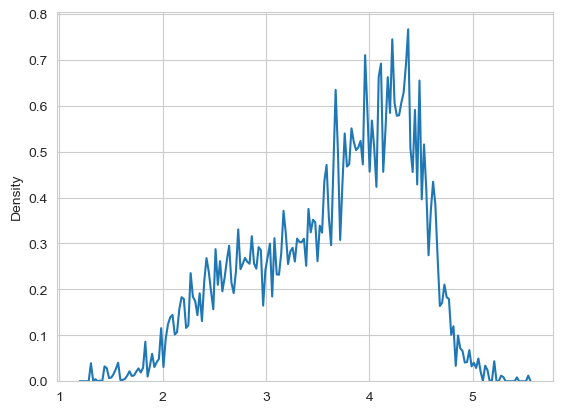

In [49]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(y_pred, bw_adjust=0.0256)

In [50]:
current_sum=0
residuals=[]
y_test_array=np.array(y_test)
for i in range(10000):
    residuals.append(y_pred[i]-y_test_array[i])
    current_sum+=(residuals[i])**2

rmse=(current_sum/10000)**0.5

In [51]:
rmse

1.3122217306355466

Now we carry out the same analysis on the results of the other two topic models, containing the n-grams.

In [52]:
yBi=all_topics_pandasBi.iloc[:,15]
XBi=all_topics_pandasBi.iloc[:,0:15]

In [53]:
X_trainBi, X_testBi, y_trainBi, y_testBi = train_test_split(XBi, yBi, random_state=0, train_size = .8)

In [54]:
y_trainBi=pd.DataFrame(y_trainBi, columns=['score'])

In [55]:
regression_modelBi = XGBRegressor( 
    max_depth = 9, 
    min_child_weight = 1, 
    gamma = 0.4, 
    subsample=0.9, 
    colsample_bytree = 0.9,
    learning_rate =0.2,
    n_estimators=300)

In [56]:
regression_modelBi.fit(X_trainBi, y_trainBi,sample_weight=classes_weights, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
y_predBi = regression_modelBi.predict(X_testBi)

<AxesSubplot:ylabel='Density'>

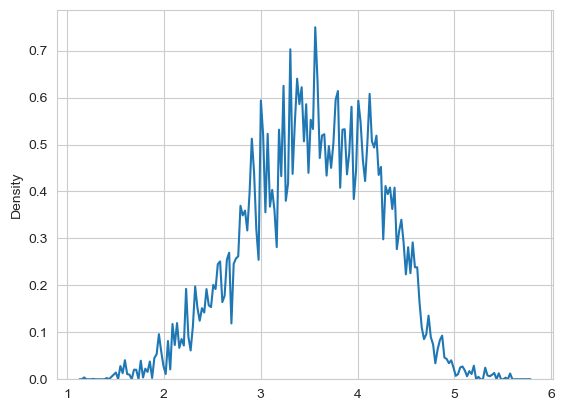

In [58]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(y_predBi, bw_adjust=0.0256)

In [59]:
current_sumBi=0
residualsBi=[]
y_test_arrayBi=np.array(y_testBi)
for i in range(10000):
    residualsBi.append(y_predBi[i]-y_test_arrayBi[i])
    current_sumBi+=(residualsBi[i])**2

rmseBi=(current_sumBi/10000)**0.5

In [60]:
rmseBi

1.40059051554944

In [61]:
yBiReplace=all_topics_pandasBiReplace.iloc[:,15]
XBiReplace=all_topics_pandasBiReplace.iloc[:,0:15]

In [62]:
X_trainBiReplace, X_testBiReplace, y_trainBiReplace, y_testBiReplace = train_test_split(XBiReplace, yBiReplace, random_state=0, train_size = .8)

In [63]:
y_trainBiReplace=pd.DataFrame(y_trainBiReplace, columns=['score'])

In [64]:
regression_modelBiReplace = XGBRegressor( 
    max_depth = 9, 
    min_child_weight = 1, 
    gamma = 0.4, 
    subsample=0.9, 
    colsample_bytree = 0.9,
    learning_rate =0.2,
    n_estimators=300)

In [65]:
regression_modelBiReplace.fit(X_trainBiReplace, y_trainBiReplace,sample_weight=classes_weights, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
y_predBiReplace = regression_modelBiReplace.predict(X_testBiReplace)

<AxesSubplot:ylabel='Density'>

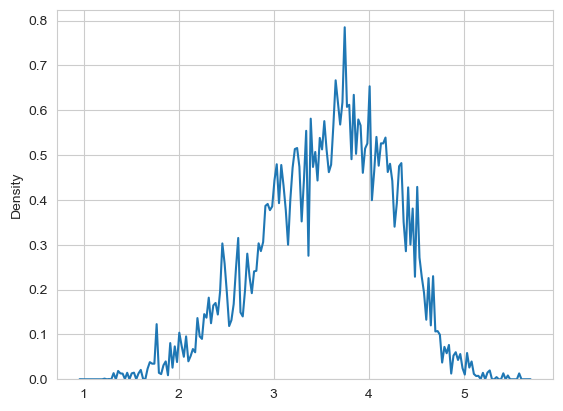

In [67]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(y_predBiReplace, bw_adjust=0.0256)

In [68]:
current_sumBiReplace=0
residualsBiReplace=[]
y_test_arrayBiReplace=np.array(y_testBiReplace)
for i in range(10000):
    residualsBiReplace.append(y_predBiReplace[i]-y_test_arrayBiReplace[i])
    current_sumBiReplace+=(residualsBiReplace[i])**2

rmseBiReplace=(current_sumBiReplace/10000)**0.5

In [69]:
rmseBiReplace

1.3928413878106034

We observe that the root mean squared error is increased by adding in the bigrams, and that the shape of the distribution looks less like we would expect from our exploratory data analysis. It seems that we will choose not to include bigrams in our model as they do not look to improve our classification.